In [ ]:
%pwd


'/content'

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
import time as tm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
X = np.loadtxt("public_trn.txt")
X_test = np.loadtxt("public_tst.txt")

In [ ]:
def compute_tu_k(c):
    k = len(c)
    tu_k = np.zeros(2*k-1)

    for i in range(k):
        tu_k[i] = 1 - 2*c[i]

    for i in range(k, 2*k-1):
        prod = 1
        for j in range(i-k, k):
            prod *= tu_k[j]
        tu_k[i] = prod
    return tu_k
def my_map(challenges):
    n_samples = challenges.shape[0]
    k = challenges.shape[1]
    transformed_challenges = np.zeros((n_samples, 2*k-1))

    for i in range(n_samples):
        c = challenges[i]
        transformed_challenges[i] = compute_tu_k(c)

    return transformed_challenges

In [ ]:
X_train = my_map(X[:, :-2])
y_train0 = X[:, -2]
y_train1 = X[:, -1]

In [ ]:
df = pd.DataFrame(X_train)
df


,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
1,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0
2,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
4,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,...,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
39996,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
39997,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
39998,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [ 1.0, 5, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=5000), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train0)
results = grid_search.cv_results_
print("Results for each parameter combination:")
for mean_test_score, std_test_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean Test Accuracy: {mean_test_score:.3f}, Std Test Accuracy: {std_test_score:.3f}, Params: {params}")

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

In [ ]:
results = grid_search.cv_results_
results


{'mean_fit_time': array([ 11.60405631,  40.61479683,   4.06926742,  12.16965814,
         23.15818086,  74.09678774,   6.06025186,  22.21794643,
         51.63821888, 161.68721232,   8.2463253 ,  62.28411417,
         58.80851221, 189.01410079,   8.47482548,  84.77079315]),
 'std_fit_time': array([0.59887048, 0.41905238, 0.48754527, 0.47399653, 1.05234324,
        1.30611332, 0.77970773, 0.92591943, 4.8275994 , 3.47518013,
        0.6744765 , 1.91110091, 3.71577795, 4.31985826, 0.76437321,
        2.0513282 ]),
 'mean_score_time': array([0.01425743, 0.00957522, 0.01132641, 0.0127337 , 0.01278539,
        0.01178517, 0.01178074, 0.01022739, 0.01314926, 0.01529975,
        0.0122952 , 0.01223764, 0.01709313, 0.01875949, 0.01263695,
        0.01125832]),
 'std_score_time': array([0.00627427, 0.00016519, 0.00343534, 0.00391359, 0.0011205 ,
        0.00194476, 0.00399324, 0.00085602, 0.00354312, 0.00541048,
        0.00405269, 0.00251477, 0.00881013, 0.00836334, 0.0034652 ,
        0.000626

In [ ]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'loss': ['hinge', 'squared_hinge'],  # Loss function
    'max_iter': [5000],  # Maximum number of iterations
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LinearSVC(), param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train0)

# Print training accuracy for each combination of parameters
results = grid_search.cv_results_
print("Results for each parameter combination:")
for mean_test_score, std_test_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean Test Accuracy: {mean_test_score:.3f}, Std Test Accuracy: {std_test_score:.3f}, Params: {params}")

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Results for each parameter combination:
Mean Test Accuracy: 0.970, Std Test Accuracy: 0.001, Params: {'C': 0.0001, 'loss': 'hinge', 'max_iter': 5000}
Mean Test Accuracy: 0.975, Std Test Accuracy: 0.000, Params: {'C': 0.0001, 'loss': 'squared_hinge', 'max_iter': 5000}
Mean Test Accuracy: 0.975, Std Test Accuracy: 0.000, Params: {'C': 0.001, 'loss': 'hinge', 'max_iter': 5000}
Mean Test Accuracy: 0.977, Std Test Accuracy: 0.001, Params: {'C': 0.001, 'loss': 'squared_hinge', 'max_iter': 5000}
Mean Test Accuracy: 0.978, Std Test Accuracy: 0.001, Params: {'C': 0.01, 'loss': 'hinge', 'max_iter': 5000}
Mean Test Accuracy: 0.977, Std Test Accuracy: 0.001, Params: {'C': 0.01, 'loss': 'squared_hinge', 'max_iter': 5000}
Mean Test Accuracy: 0.980, Std Test Accuracy: 0.002, Params: {'C': 0.1, 'loss': 'hinge', 'max_iter': 5000}
Mean Test Accuracy: 0.977, Std Test Accuracy: 0.001, Params: {'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 5000}

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
param_grid = {
    'C': [10],  # Regularization parameter
    'loss': ['hinge'],  # Loss function
    'max_iter': [10000],# Maximum number of iterations
    'tol': [0.000001, 0.00001, 0.00015, 0.001],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LinearSVC(), param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train0)

# Print training accuracy for each combination of parameters
results = grid_search.cv_results_
print("Results for each parameter combination:")
for mean_test_score, std_test_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean Test Accuracy: {mean_test_score:.3f}, Std Test Accuracy: {std_test_score:.3f}, Params: {params}")

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Results for each parameter combination:
Mean Test Accuracy: 0.981, Std Test Accuracy: 0.001, Params: {'C': 10, 'loss': 'hinge', 'max_iter': 10000, 'tol': 1e-06}
Mean Test Accuracy: 0.981, Std Test Accuracy: 0.001, Params: {'C': 10, 'loss': 'hinge', 'max_iter': 10000, 'tol': 1e-05}
Mean Test Accuracy: 0.981, Std Test Accuracy: 0.001, Params: {'C': 10, 'loss': 'hinge', 'max_iter': 10000, 'tol': 0.00015}
Mean Test Accuracy: 0.981, Std Test Accuracy: 0.001, Params: {'C': 10, 'loss': 'hinge', 'max_iter': 10000, 'tol': 0.001}

Best parameters found:  {'C': 10, 'loss': 'hinge', 'max_iter': 10000, 'tol': 1e-05}
Best cross-validation score: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization parameter
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver for optimization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RidgeClassifier(), param_grid=param_grid, cv=5, verbose=6, n_jobs=-1)

# Fit the GridSearchCV object

grid_search.fit(X_train, y_train0)

# Print training accuracy for each combination of parameters
results = grid_search.cv_results_
print("Results for each parameter combination:")
for mean_test_score, std_test_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean Test Accuracy: {mean_test_score:.3f}, Std Test Accuracy: {std_test_score:.3f}, Params: {params}")

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Fitting 5 folds for each of 21 candidates, totalling 105 fits
Results for each parameter combination:
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 0.1, 'solver': 'auto'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 0.1, 'solver': 'svd'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 0.1, 'solver': 'cholesky'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 0.1, 'solver': 'lsqr'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 0.1, 'solver': 'sparse_cg'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 0.1, 'solver': 'sag'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 0.1, 'solver': 'saga'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 1.0, 'solver': 'auto'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 0.002, Params: {'alpha': 1.0, 'solver': 'svd'}
Mean Test Accuracy: 0.637, Std Test Accuracy: 

In [ ]:
def my_fit(Z_trn):
    # Extract features and responses from Z_trn
    X_train = Z_trn[:, :-2]
    y_train0 = Z_trn[:, -2]
    y_train1 = Z_trn[:, -1]

    # Map the training data
    X_train_mapped = my_map(X_train)
    model0 = LinearSVC( C=10, loss = "hinge", max_iter=10000, tol=1e-6)
    model1 = LinearSVC( C=10, loss = "squared_hinge", max_iter=10000, tol=1e-6)
    # Fit the models
    model0.fit(X_train_mapped, y_train0)
    model1.fit(X_train_mapped, y_train1)

    # Extract coefficients and intercepts
    W0, b0 = model0.coef_, model0.intercept_
    W1, b1 = model1.coef_, model1.intercept_
    # Predict training labels to calculate training accuracy
    y_pred0 = model0.predict(X_train_mapped)
    y_pred1 = model1.predict(X_train_mapped)

    # Calculate training accuracy
    acc0 = accuracy_score(y_train0, y_pred0)
    acc1 = accuracy_score(y_train1, y_pred1)


    return W0, b0, W1, b1, acc0, acc1

In [ ]:
n_trials = 1
d_size = 0
t_train = 0
t_map = 0
acc0_test = 0
acc1_test = 0
acc0_train = 0
acc1_train = 0


In [ ]:
for t in range(n_trials):
    tic = tm.perf_counter()
    w0, b0, w1, b1, acc0_, acc1_ = my_fit(X)
    toc = tm.perf_counter()

    t_train += toc - tic
    w0 = w0.reshape(-1)
    w1 = w1.reshape(-1)

    d_size += max(w0.shape[0], w1.shape[0])

    tic = tm.perf_counter()
    feat = my_map(X_test[:, :-2])
    toc = tm.perf_counter()
    t_map += toc - tic


    scores0 = feat.dot(w0) + b0
    scores1 = feat.dot(w1) + b1

    pred0 = np.zeros_like(scores0)
    pred0[scores0 > 0] = 1
    pred1 = np.zeros_like(scores1)
    pred1[scores1 > 0] = 1

    acc0_test += np.average(X_test[:, -2] == pred0)
    acc1_test += np.average(X_test[:, -1] == pred1)

    acc0_train += acc0_
    acc1_train += acc1_

d_size /= n_trials
t_train /= n_trials
t_map /= n_trials
acc0_test /= n_trials
acc1_test /= n_trials
acc0_train /= n_trials
acc1_train /= n_trials

print(f"Avg Training Time: {t_train:.4f} seconds")
print(f"Avg Mapping Time: {t_map:.4f} seconds")
print(f"Avg Training Accuracy for Response0: {acc0_train:.4f}")
print(f"Avg Training Accuracy for Response1: {acc1_train:.4f}")
print(f"Avg Accuracy for Response0: {acc0_test:.4f}")
print(f"Avg Accuracy for Response1: {acc1_test:.4f}")
print(f"Avg dimension Size: {d_size:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Avg Training Time: 17.5306 seconds
Avg Mapping Time: 1.8411 seconds
Avg Training Accuracy for Response0: 0.9818
Avg Training Accuracy for Response1: 0.9994
Avg Accuracy for Response0: 0.9844
Avg Accuracy for Response1: 0.9989
Avg dimension Size: 63.0000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

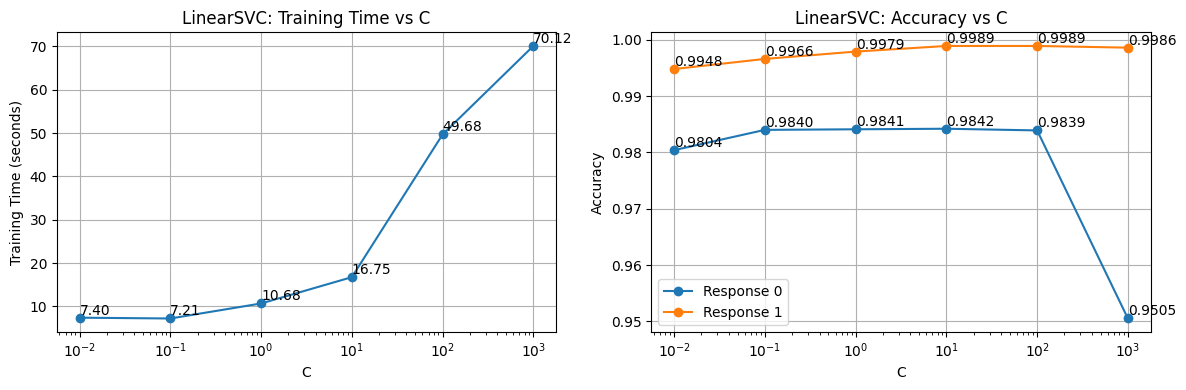

In [ ]:
def run_experiments_linear_svc_C():
    results = []

    C_values = [0.01, 0.1, 1.0, 10.0, 100, 1000]
    for C in C_values:
        tic = tm.perf_counter()
        model0 = LinearSVC(C=C, loss='hinge', max_iter=10000, tol=1e-4)
        model1 = LinearSVC(C=C, loss='squared_hinge', max_iter=10000, tol=1e-4)
        X_train_mapped = my_map(X[:, :-2])
        model0.fit(X_train_mapped, X[:, -2])
        model1.fit(X_train_mapped, X[:, -1])
        toc = tm.perf_counter()
        t_train = toc - tic

        X_test_mapped = my_map(X_test[:, :-2])
        y_pred0_test = model0.predict(X_test_mapped)
        y_pred1_test = model1.predict(X_test_mapped)

        acc0_test = accuracy_score(X_test[:, -2], y_pred0_test)
        acc1_test = accuracy_score(X_test[:, -1], y_pred1_test)

        results.append((C, t_train, acc0_test, acc1_test))

    return results


def plot_linear_svc_C(results):
    C_values = [r[0] for r in results]
    t_train_values = [r[1] for r in results]
    acc0_test_values = [r[2] for r in results]
    acc1_test_values = [r[3] for r in results]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(C_values, t_train_values, marker='o')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Training Time (seconds)')
    plt.title('LinearSVC: Training Time vs C')
    plt.grid(True)

    for C, t_train in zip(C_values, t_train_values):
        plt.text(C, t_train, f'{t_train:.2f}', ha='left', va='bottom')

    plt.subplot(1, 2, 2)
    plt.plot(C_values, acc0_test_values, marker='o', label='Response 0')
    plt.plot(C_values, acc1_test_values, marker='o', label='Response 1')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('LinearSVC: Accuracy vs C')
    plt.legend()
    plt.grid(True)

    for C, acc0, acc1 in zip(C_values, acc0_test_values, acc1_test_values):
        plt.text(C, acc0, f'{acc0:.4f}', ha='left', va='bottom')
        plt.text(C, acc1, f'{acc1:.4f}', ha='left', va='bottom')

    plt.tight_layout()
    plt.show()


# Run experiments and plot results for C values
results_C = run_experiments_linear_svc_C()
plot_linear_svc_C(results_C)




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

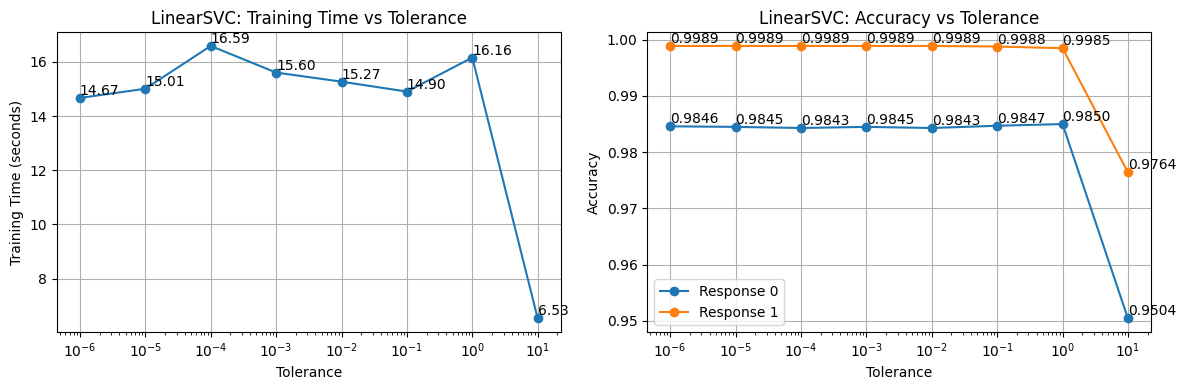

In [ ]:
def run_experiments_linear_svc_tol():
    results = []

    tol_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
    for tol in tol_values:
        tic = tm.perf_counter()
        model0 = LinearSVC(C=10, loss='hinge', max_iter=10000, tol=tol)
        model1 = LinearSVC(C=10, loss='squared_hinge', max_iter=10000, tol=tol)
        X_train_mapped = my_map(X[:, :-2])
        model0.fit(X_train_mapped, X[:, -2])
        model1.fit(X_train_mapped, X[:, -1])
        toc = tm.perf_counter()
        t_train = toc - tic

        X_test_mapped = my_map(X_test[:, :-2])
        y_pred0_test = model0.predict(X_test_mapped)
        y_pred1_test = model1.predict(X_test_mapped)

        acc0_test = accuracy_score(X_test[:, -2], y_pred0_test)
        acc1_test = accuracy_score(X_test[:, -1], y_pred1_test)

        results.append((tol, t_train, acc0_test, acc1_test))

    return results

def plot_linear_svc_tol(results):
    tol_values = [r[0] for r in results]
    t_train_values = [r[1] for r in results]
    acc0_test_values = [r[2] for r in results]
    acc1_test_values = [r[3] for r in results]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(tol_values, t_train_values, marker='o')
    plt.xscale('log')
    plt.xlabel('Tolerance')
    plt.ylabel('Training Time (seconds)')
    plt.title('LinearSVC: Training Time vs Tolerance')
    plt.grid(True)

    for tol, t_train in zip(tol_values, t_train_values):
        plt.text(tol, t_train, f'{t_train:.2f}', ha='left', va='bottom')

    plt.subplot(1, 2, 2)
    plt.plot(tol_values, acc0_test_values, marker='o', label='Response 0')
    plt.plot(tol_values, acc1_test_values, marker='o', label='Response 1')
    plt.xscale('log')
    plt.xlabel('Tolerance')
    plt.ylabel('Accuracy')
    plt.title('LinearSVC: Accuracy vs Tolerance')
    plt.legend()
    plt.grid(True)

    for tol, acc0, acc1 in zip(tol_values, acc0_test_values, acc1_test_values):
        plt.text(tol, acc0, f'{acc0:.4f}', ha='left', va='bottom')
        plt.text(tol, acc1, f'{acc1:.4f}', ha='left', va='bottom')

    plt.tight_layout()
    plt.show()


# Run experiments and plot results for tolerance values
results_tol = run_experiments_linear_svc_tol()
plot_linear_svc_tol(results_tol)


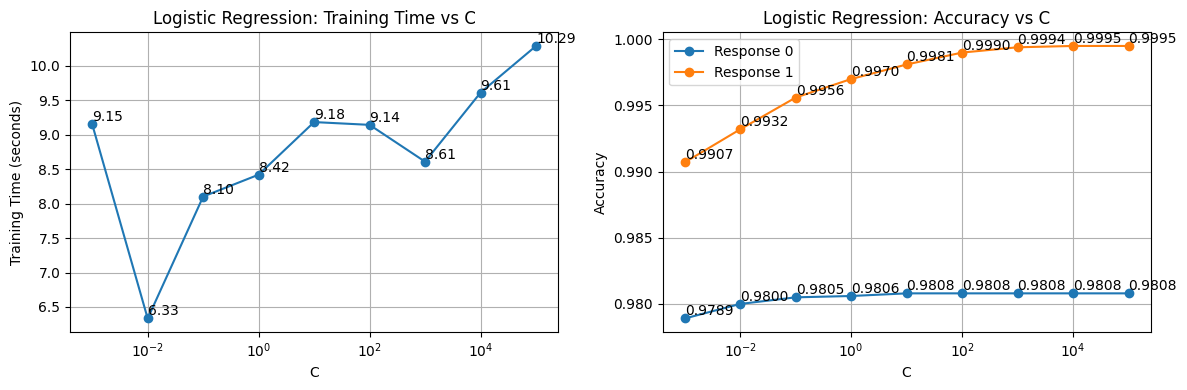

In [ ]:
def run_experiments_logistic_regression_C(c_values):
    results_c = []

    for c in c_values:
        tic = tm.perf_counter()
        model0 = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=5000, tol=1e-4)
        model1 = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=5000, tol=1e-4)
        X_train_mapped = my_map(X[:, :-2])
        model0.fit(X_train_mapped, X[:, -2])
        model1.fit(X_train_mapped, X[:, -1])
        toc = tm.perf_counter()
        t_train = toc - tic

        X_test_mapped = my_map(X_test[:, :-2])
        y_pred0_test = model0.predict(X_test_mapped)
        y_pred1_test = model1.predict(X_test_mapped)

        acc0_test = accuracy_score(X_test[:, -2], y_pred0_test)
        acc1_test = accuracy_score(X_test[:, -1], y_pred1_test)

        results_c.append((c, t_train, acc0_test, acc1_test))

    return results_c
def plot_logistic_regression_C(results):
    C_values = [r[0] for r in results]
    t_train_values = [r[1] for r in results]
    acc0_test_values = [r[2] for r in results]
    acc1_test_values = [r[3] for r in results]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(C_values, t_train_values, marker='o')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Training Time (seconds)')
    plt.title('Logistic Regression: Training Time vs C')
    plt.grid(True)

    for C, t_train in zip(C_values, t_train_values):
        plt.text(C, t_train, f'{t_train:.2f}', ha='left', va='bottom')

    plt.subplot(1, 2, 2)
    plt.plot(C_values, acc0_test_values, marker='o', label='Response 0')
    plt.plot(C_values, acc1_test_values, marker='o', label='Response 1')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('Logistic Regression: Accuracy vs C')
    plt.legend()
    plt.grid(True)

    for C, acc0, acc1 in zip(C_values, acc0_test_values, acc1_test_values):
        plt.text(C, acc0, f'{acc0:.4f}', ha='left', va='bottom')
        plt.text(C, acc1, f'{acc1:.4f}', ha='left', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage:
# Define C values to experiment with
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1e4, 1e5]
results_c = run_experiments_logistic_regression_C(c_values)
plot_logistic_regression_C(results_c)

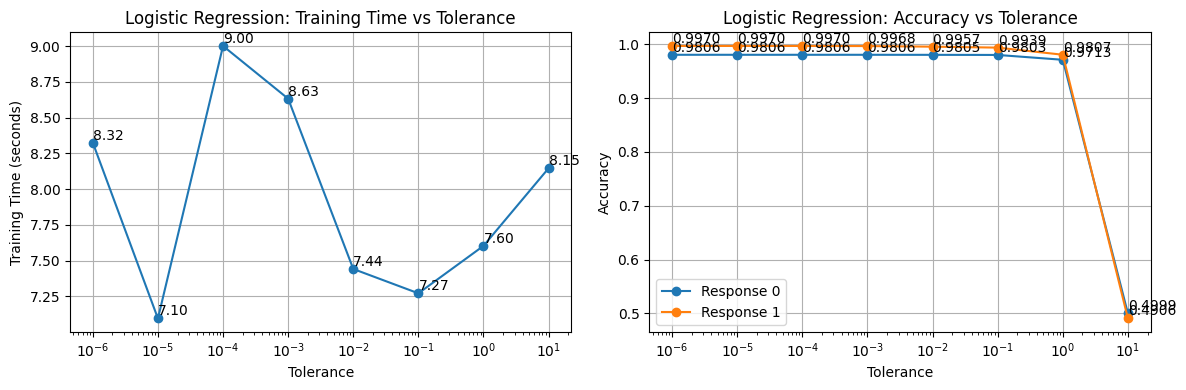

In [ ]:
def run_experiments_logistic_regression_tol(tol_values):
    results_tol = []

    for tol in tol_values:
        tic = tm.perf_counter()
        model0 = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=10000, tol=tol)
        model1 = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=10000, tol=tol)
        X_train_mapped = my_map(X[:, :-2])
        model0.fit(X_train_mapped, X[:, -2])
        model1.fit(X_train_mapped, X[:, -1])
        toc = tm.perf_counter()
        t_train = toc - tic

        X_test_mapped = my_map(X_test[:, :-2])
        y_pred0_test = model0.predict(X_test_mapped)
        y_pred1_test = model1.predict(X_test_mapped)

        acc0_test = accuracy_score(X_test[:, -2], y_pred0_test)
        acc1_test = accuracy_score(X_test[:, -1], y_pred1_test)

        results_tol.append((tol, t_train, acc0_test, acc1_test))

    return results_tol

def plot_logistic_regression_tol(results):
    tol_values = [r[0] for r in results]
    t_train_values = [r[1] for r in results]
    acc0_test_values = [r[2] for r in results]
    acc1_test_values = [r[3] for r in results]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(tol_values, t_train_values, marker='o')
    plt.xscale('log')
    plt.xlabel('Tolerance')
    plt.ylabel('Training Time (seconds)')
    plt.title('Logistic Regression: Training Time vs Tolerance')
    plt.grid(True)

    for tol, t_train in zip(tol_values, t_train_values):
        plt.text(tol, t_train, f'{t_train:.2f}', ha='left', va='bottom')

    plt.subplot(1, 2, 2)
    plt.plot(tol_values, acc0_test_values, marker='o', label='Response 0')
    plt.plot(tol_values, acc1_test_values, marker='o', label='Response 1')
    plt.xscale('log')
    plt.xlabel('Tolerance')
    plt.ylabel('Accuracy')
    plt.title('Logistic Regression: Accuracy vs Tolerance')
    plt.legend()
    plt.grid(True)

    for tol, acc0, acc1 in zip(tol_values, acc0_test_values, acc1_test_values):
        plt.text(tol, acc0, f'{acc0:.4f}', ha='left', va='bottom')
        plt.text(tol, acc1, f'{acc1:.4f}', ha='left', va='bottom')

    plt.tight_layout()
    plt.show()
# Example usage:
# Define tolerance values to experiment with
tol_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
results_tol = run_experiments_logistic_regression_tol(tol_values)
plot_logistic_regression_tol(results_tol)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

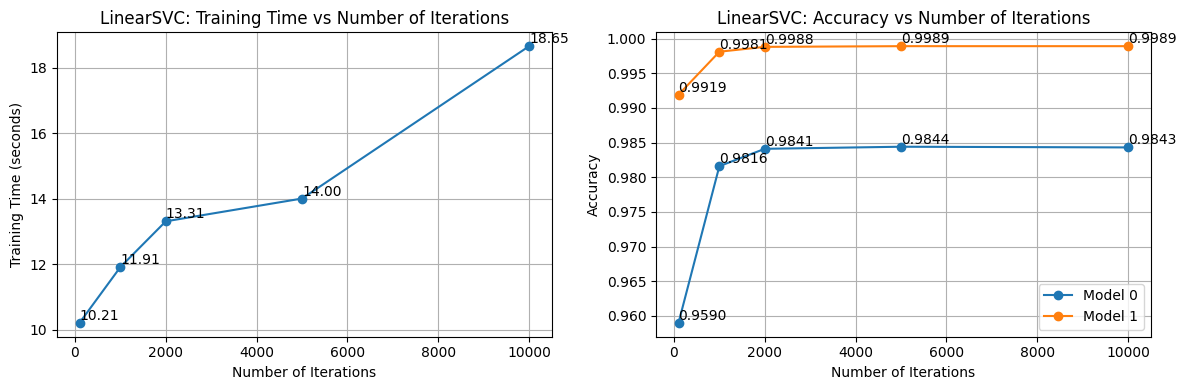

In [ ]:
def run_experiments_linear_svc_iterations():
    iter_values = [100, 1000, 2000, 5000, 10000]
    results_iter = []

    for iter in iter_values:
        tic = tm.perf_counter()
        model0 = LinearSVC(C=10.0, loss='hinge',  max_iter=iter, tol=1e-4)
        model1 = LinearSVC(C=10.0, loss='squared_hinge', max_iter=iter, tol=1e-4)
        X_train_mapped = my_map(X[:, :-2])
        model0.fit(X_train_mapped, X[:, -2])
        model1.fit(X_train_mapped, X[:, -1])
        toc = tm.perf_counter()
        t_train = toc - tic

        X_test_mapped = my_map(X_test[:, :-2])
        y_pred0_test = model0.predict(X_test_mapped)
        y_pred1_test = model1.predict(X_test_mapped)

        acc0_test = accuracy_score(X_test[:, -2], y_pred0_test)
        acc1_test = accuracy_score(X_test[:, -1], y_pred1_test)

        results_iter.append((iter, t_train, acc0_test, acc1_test))

    return results_iter

def plot_linear_svc_iterations(results):
    iteration_values = [r[0] for r in results]
    t_train_values = [r[1] for r in results]
    acc0_test_values = [r[2] for r in results]
    acc1_test_values = [r[3] for r in results]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(iteration_values, t_train_values, marker='o')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Training Time (seconds)')
    plt.title('LinearSVC: Training Time vs Number of Iterations')
    plt.grid(True)

    for iters, t_train in zip(iteration_values, t_train_values):
        plt.text(iters, t_train, f'{t_train:.2f}', ha='left', va='bottom')

    plt.subplot(1, 2, 2)
    plt.plot(iteration_values, acc0_test_values, marker='o', label='Model 0')
    plt.plot(iteration_values, acc1_test_values, marker='o', label='Model 1')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.title('LinearSVC: Accuracy vs Number of Iterations')
    plt.legend()
    plt.grid(True)

    for iters, acc0, acc1 in zip(iteration_values, acc0_test_values, acc1_test_values):
        plt.text(iters, acc0, f'{acc0:.4f}', ha='left', va='bottom')
        plt.text(iters, acc1, f'{acc1:.4f}', ha='left', va='bottom')

    plt.tight_layout()
    plt.show()

# Run experiments and plot results for LinearSVC
results_linearsvc_iterations = run_experiments_linear_svc_iterations()
plot_linear_svc_iterations(results_linearsvc_iterations)

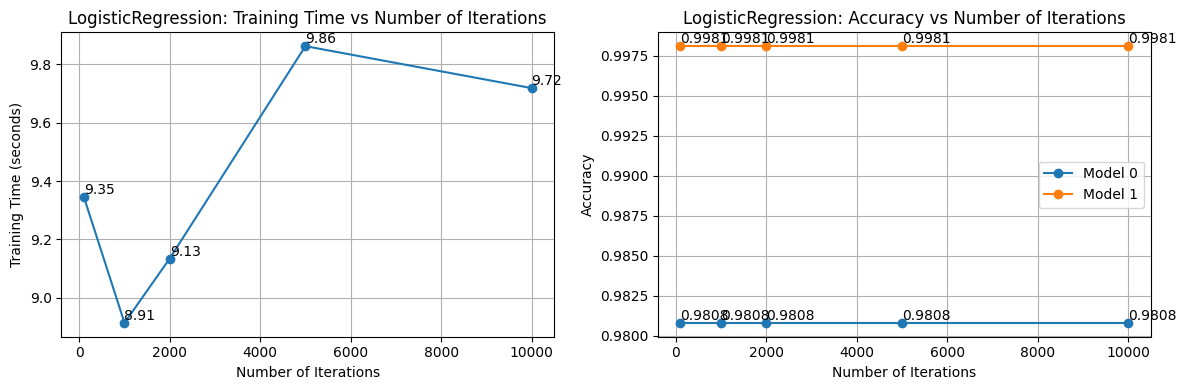

In [ ]:
def run_experiments_logistic_regression_iterations():
    iter_values = [100, 1000, 2000, 5000, 10000]
    results_iter = []

    for iter in iter_values:
        tic = tm.perf_counter()
        model0 = LogisticRegression(C=10.0, penalty='l2', solver='liblinear', max_iter=iter, tol=1e-4)
        model1 = LogisticRegression(C=10.0, penalty='l2', solver='liblinear', max_iter=iter, tol=1e-4)
        X_train_mapped = my_map(X[:, :-2])
        model0.fit(X_train_mapped, X[:, -2])
        model1.fit(X_train_mapped, X[:, -1])
        toc = tm.perf_counter()
        t_train = toc - tic

        X_test_mapped = my_map(X_test[:, :-2])
        y_pred0_test = model0.predict(X_test_mapped)
        y_pred1_test = model1.predict(X_test_mapped)

        acc0_test = accuracy_score(X_test[:, -2], y_pred0_test)
        acc1_test = accuracy_score(X_test[:, -1], y_pred1_test)

        results_iter.append((iter, t_train, acc0_test, acc1_test))

    return results_iter

def plot_logistic_regression_iterations(results):
    iteration_values = [r[0] for r in results]
    t_train_values = [r[1] for r in results]
    acc0_test_values = [r[2] for r in results]
    acc1_test_values = [r[3] for r in results]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(iteration_values, t_train_values, marker='o')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Training Time (seconds)')
    plt.title('LogisticRegression: Training Time vs Number of Iterations')
    plt.grid(True)

    for iters, t_train in zip(iteration_values, t_train_values):
        plt.text(iters, t_train, f'{t_train:.2f}', ha='left', va='bottom')

    plt.subplot(1, 2, 2)
    plt.plot(iteration_values, acc0_test_values, marker='o', label='Model 0')
    plt.plot(iteration_values, acc1_test_values, marker='o', label='Model 1')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.title('LogisticRegression: Accuracy vs Number of Iterations')
    plt.legend()
    plt.grid(True)

    for iters, acc0, acc1 in zip(iteration_values, acc0_test_values, acc1_test_values):
        plt.text(iters, acc0, f'{acc0:.4f}', ha='left', va='bottom')
        plt.text(iters, acc1, f'{acc1:.4f}', ha='left', va='bottom')

    plt.tight_layout()
    plt.show()

# Run experiments and plot results for LinearSVC
results_logistic_regression_iterations = run_experiments_logistic_regression_iterations()
plot_logistic_regression_iterations(results_logistic_regression_iterations)